In [1]:
import pickle
import matplotlib.pyplot as plt
import collections
import numpy as np
import pandas as pd
import pickle

In [2]:
dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))

In [3]:
def calculate_overlap(xmin, xmax, ymin, ymax):
    
    Range = collections.namedtuple('Range', ['start', 'end'])
    
    r1 = Range(xmin, xmax)
    r2 = Range(ymin, ymax)
    latest_start = max(r1.start, r2.start)
    earliest_end = min(r1.end, r2.end)
    delta = (earliest_end - latest_start).days + 1
    overlap = bool(max(0, delta))
    
    return(overlap)

def calculate_y(xmin, xmax, noisy=False):
    
    if noisy: print(f'NP {station_no}')

    for level in range(1,5):

        if noisy: print(f'Trying level {level}')

        overlap_flag = False


        if level in date_intervals:

            # Stations exist at this level, compare

            for station_key in date_intervals[level].keys():

                (station_min, station_max) = date_intervals[level][station_key]

                overlap = calculate_overlap(xmin, xmax, station_min, station_max)    

                if overlap:
                    if noisy: print(f'Overlap Exists with NP {station_key}')
                    overlap_flag = True
                    break

            if overlap == False:
                if noisy: print(f'No overlap at level {level} - placed.')
                y = levels[level]
                break

        else:
            # No stations at this level
            if noisy: print(f'No stations at level {level} yet - placed.')
            y = levels[level]
            break
                
    return (y, level)

def get_color_cycle():
    
    c = []
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for i in range(20):
        c = c + colors
        
    return(c)

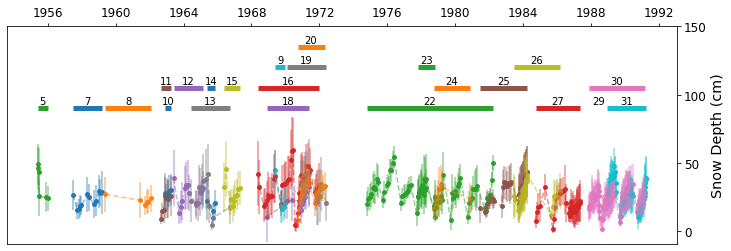

In [4]:
line_depths = dep_l

date_intervals = collections.defaultdict(dict)

y0 = 90
levels = {1:y0+0,
          2:y0+15,
          3:y0+30,
          4:y0+45,
         }

fig, ax1 = plt.subplots(1,1,figsize=(12,4))
c = get_color_cycle()
for station_no, color in zip(list(line_depths.keys()), c):
    
        
    line_stats = []
    
    if station_no in sorted(line_depths):

        for column in line_depths[station_no].columns:

            data_dict= {'dt':column,
                       'mean': np.nanmean(line_depths[station_no][column]),
                       'std': np.std(line_depths[station_no][column]),
                       }

            line_stats.append(data_dict)

        df = pd.DataFrame.from_dict(line_stats, orient='columns')

        df.index = df['dt']
        
        df = df.sort_index()

        df = df[df['mean'] > 0]


        ax1.scatter(df['dt'], df['mean'],c=color,s=15)

        ax1.errorbar(df['dt'], df['mean'], yerr = df['std'], alpha=0.5, ls='--', color = color)


    ######################################################################
    
    xmin, xmax = df['dt'][0], df['dt'][-1]

    (y, level) = calculate_y(xmin, xmax, noisy=False)
    
    ax1.hlines(y = y, xmin = xmin, xmax = xmax, lw=5, color = color)
    
    xave = xmin + (xmax - xmin)/2
    ax1.annotate(f'{station_no}', xy = (xave, y+3), xycoords = 'data', ha='center')

    date_intervals[level][station_no] = (xmin,xmax)
    

    
    ######################################################################


ax1.set_facecolor('none')
        
ax1.set_ylabel('Snow Depth (cm)', fontsize = 'x-large')
ax1.xaxis.tick_top()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylim(-9,150)
ax1.set_yticks(range(0,151,50))

ax1.tick_params(labelsize='large')

fig.subplots_adjust(hspace=-0.15)

(23,)


Text(0, 0.5, 'Number of Transects')

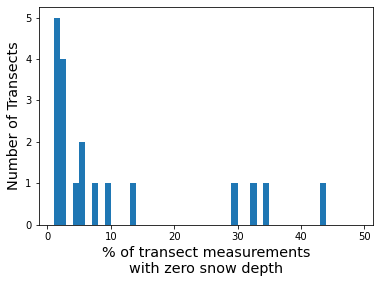

In [5]:
lens = []
Lens = []

for key in dep_l.keys():
    
    for datekey in dep_l[key].keys():
        
        arr = dep_l[key][datekey]
        
        num_zeros = np.count_nonzero(arr==0)

        n_meas = np.count_nonzero(~np.isnan(arr))
    
        
        lens.append(num_zeros/len(arr))
        Lens.append(n_meas)
        

lens = np.array(lens)
print(lens[lens!=0].shape)

plt.hist(lens*100,np.arange(1,50))

plt.xlabel('% of transect measurements\nwith zero snow depth', fontsize='x-large')
plt.ylabel('Number of Transects', fontsize='x-large')
# plt.annotate('n=28')

(array([  4.,   9.,  32.,  71., 110., 116.,  71.,  48.,  24.,   9.,   3.,
          2.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <BarContainer object of 12 artists>)

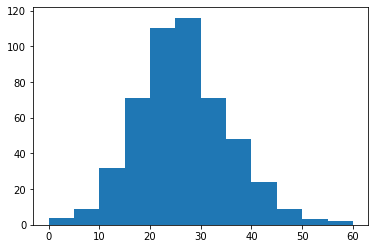

In [6]:
mds = []

for key in dep_l.keys():
    
    for datekey in dep_l[key].keys():
        
        mds.append( np.nanmean(dep_l[key][datekey]) )
        
mds = np.array(mds)
        
plt.hist(mds,np.arange(0,61,5))

In [7]:
len(mds[(mds<40) & (mds>20)])/499

0.6893787575150301

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,   0., 305.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 160.,   0.,   0.]),
 array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
 <BarContainer object of 74 artists>)

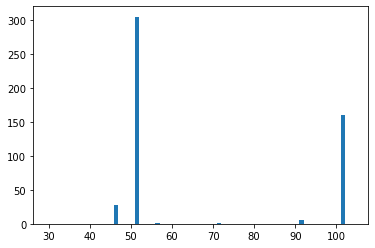

In [8]:
plt.hist(Lens,bins=np.arange(30,105,1))

In [9]:
(5+27)/499

0.06412825651302605

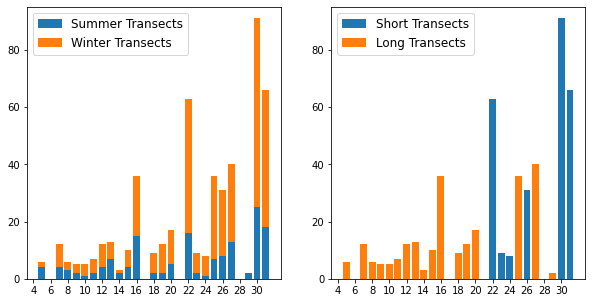

In [10]:
num_transects_list = []

for key in dep_l.keys():
    
    winter_transects = 0
    summer_transects = 0
    long_transects = 0
    short_transects = 0
    
    for datekey in dep_l[key].keys():
        
        if datekey.month in [10,11,12,1,2,3]:
            winter_transects += 1
        else:
            summer_transects += 1
            
            
        if len(dep_l[key][datekey]) > 70:
            long_transects += 1
        else:
            short_transects += 1
    
    num_transects_list.append({'station':key,
                               'long':long_transects,
                               'short':short_transects,
                               'winter':winter_transects,
                               'summer':summer_transects})
    
    
    
    
    
dft = pd.DataFrame(num_transects_list)    

# df.sort_values('station no.',inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.bar(dft['station'], dft['summer'], label= 'Summer Transects')
ax1.bar(dft['station'], dft['winter'],bottom=dft['summer'], label = 'Winter Transects')

ax2.bar(dft['station'], dft['short'], label= 'Short Transects')
ax2.bar(dft['station'], dft['long'],bottom=dft['short'], label = 'Long Transects')


for ax in [ax1, ax2]:
    
    ax.legend(fontsize='large')
    ax.set_xticks(range(4,32,2))
    ax.set_ylim(0,95)

plt.show()

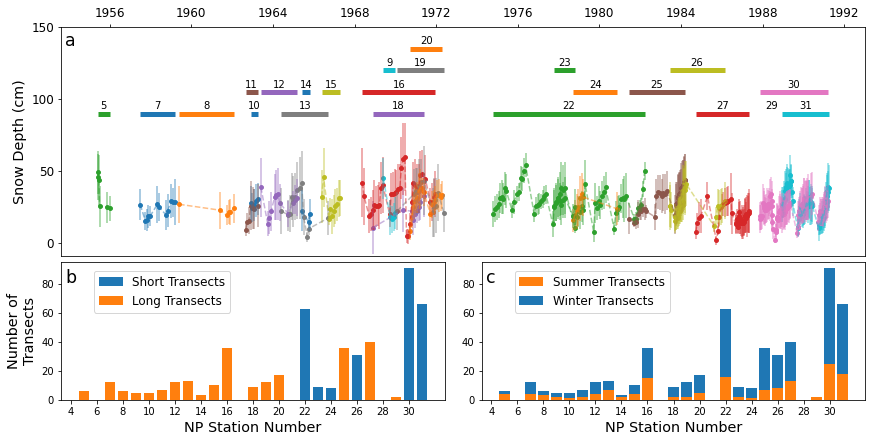

In [12]:
fig = plt.figure(constrained_layout=True,figsize=(12,6))

gs = fig.add_gridspec(2, 2, height_ratios=[1,0.6])

ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1, :-1])

ax3 = fig.add_subplot(gs[1:, -1])


# #####################

ax3.bar(dft['station'], dft['summer'], label= 'Summer Transects', color = 'tab:orange')
ax3.bar(dft['station'], dft['winter'],bottom=dft['summer'], label = 'Winter Transects', color='#1f77b4')

ax2.bar(dft['station'], dft['short'], label= 'Short Transects')
ax2.bar(dft['station'], dft['long'],bottom=dft['short'], label = 'Long Transects')

##############

line_depths = dep_l

date_intervals = collections.defaultdict(dict)

y0 = 90
levels = {1:y0+0,
          2:y0+15,
          3:y0+30,
          4:y0+45,
         }

# fig, ax1 = plt.subplots(1,1,figsize=(12,4))
c = get_color_cycle()
 

for station_no, color in zip(list(line_depths.keys()), c):
    
        
    line_stats = []
    
    if station_no in sorted(line_depths):

        for column in line_depths[station_no].columns:

            data_dict= {'dt':column,
                       'mean': np.nanmean(line_depths[station_no][column]),
                       'std': np.std(line_depths[station_no][column]),
                       }

            line_stats.append(data_dict)

        df = pd.DataFrame.from_dict(line_stats, orient='columns')

        df.index = df['dt']
        
        df = df.sort_index()

        df = df[df['mean'] > 0]


        ax1.scatter(df['dt'], df['mean'],c=color,s=15)

        ax1.errorbar(df['dt'], df['mean'], yerr = df['std'], alpha=0.5, ls='--', color = color)


    ######################################################################
    
    xmin, xmax = df['dt'][0], df['dt'][-1]

    (y, level) = calculate_y(xmin, xmax, noisy=False)
    
    ax1.hlines(y = y, xmin = xmin, xmax = xmax, lw=5, color = color)
    
    xave = xmin + (xmax - xmin)/2
    ax1.annotate(f'{station_no}', xy = (xave, y+3), xycoords = 'data', ha='center')

    date_intervals[level][station_no] = (xmin,xmax)
    

    
    ######################################################################

ax1.annotate(text=f'a',xy=(0.005,0.92),xycoords='axes fraction',fontsize='xx-large',)
    
for ax, letter in zip([ax2, ax3],['b','c']):
    
    ax.annotate(text=f'{letter}',xy=(0.01,0.85),xycoords='axes fraction',fontsize='xx-large',)
    ax.legend(fontsize='large',
              loc = 'upper left',
              bbox_to_anchor=(0.07,0.98),
             )
    ax.set_xticks(range(4,32,2))
    ax.set_ylim(0,95)

ax1.set_ylabel('Snow Depth (cm)', fontsize = 'x-large')
ax1.xaxis.tick_top()
# ax1.yaxis.tick_right()
# ax1.yaxis.set_label_position("right")
ax1.set_ylim(-9,150)
ax1.set_yticks(range(0,151,50))

for ax in [ax2,ax3]:
    ax.set_xlabel('NP Station Number', fontsize='x-large')

ax1.tick_params(labelsize='large')

# fig.subplots_adjust(hspace=-0.15)

ax2.set_ylabel('Number of\nTransects', fontsize='x-large')

plt.savefig('../figures/fig_2.png', dpi=500, bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/figs/fig2.png', bbox_inches='tight',dpi=500)